# Homework 4

Enter your name in the cell below. If you are using any late submission days, please mention that here too.

### Name:    --- Byoungjin Oh

CS 242, Fall 2020; Instructor: Vinayak Rao 

Due: Monday, March 2, 11:59PM, submit to Blackboard  
(Posted Feb 24, 2020)

Please submit this homework as a single Jupyter notebook (__YOURNAME_hw4.ipynb__ file) to Blackboard before the deadline: __11:59pm Monday, Mar 2__. 

+ Please add you name to the top of the homework notebook, and to the name of the notebook file. 
+ Any paragraph/descriptive/yes-no answers that you want to be considered for grading must be included as separate markdown cells in the Jupyter notebook (rather than as comments in the code), and these cells should accompany the associated questions: graders cannot be expected to hunt through your submission to find answers to individual questions. Please post any questions you have on piazza.

__Important__

+ For this homework you can __ONLY__ use the python libraries in the cell below. 
+ __For full credit, all plots should be properly labeled and titled__
+ Unless specified, you will lose upto 25% credit if you use loops of any kind. For full points, you should use pandas functionality, with code that returns correct answers if run on a test dataframe with the numeric entries changed.

__Suggestion__
+ To help validate your code, create smaller versions of the provided datasets where you can calculate quantities by hand, and make sure your code agrees with these numbers
+ It is a good idea (if possible) to download the notebook and work on it on your own computer. 

In [1]:
# Execute this cell
import pandas as pd
import numpy as np
from plotnine import *
import statsmodels.formula.api as smf

## Q1: Movie dataset (1 + 4 + 5 + 4 + 7 + 4)

The first two parts will try to create a figure like https://peltiertech.com/images/2011-06/BoxPlotV5.png (but with only 2 boxplots)

a) Load the dataset 'movies.csv'. Drop all rows with NAs, and keep only those movies with column 'country' equal to USA, and made after 1980. Call this dataframe movie, we will be using this dataset for the rest of Q1 

In [2]:
###
### YOUR CODE HERE
###
movie = pd.read_csv('movies.csv')
movie = movie.dropna()
movie = movie[movie['country'] == 'USA']
movie = movie[movie['title_year'] > 1980]
movie


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5012,Color,David Ayer,233.0,109.0,453.0,120.0,Martin Donovan,1000.0,10499968.0,Action|Crime|Drama|Thriller,...,212.0,English,USA,R,35000000.0,2014.0,206.0,5.7,1.85,10000
5015,Black and White,Richard Linklater,61.0,100.0,0.0,0.0,Richard Linklater,5.0,1227508.0,Comedy|Drama,...,80.0,English,USA,R,23000.0,1991.0,0.0,7.1,1.37,2000
5033,Color,Shane Carruth,143.0,77.0,291.0,8.0,David Sullivan,291.0,424760.0,Drama|Sci-Fi|Thriller,...,371.0,English,USA,PG-13,7000.0,2004.0,45.0,7.0,1.85,19000
5035,Color,Robert Rodriguez,56.0,81.0,0.0,6.0,Peter Marquardt,121.0,2040920.0,Action|Crime|Drama|Romance|Thriller,...,130.0,Spanish,USA,R,7000.0,1992.0,20.0,6.9,1.37,0


b) Make a plot showing the boxplots of the budget and gross of all movies made in the year 1990. These should be side-by-side in the same plot. You will have to use the melt function. Fill the box plot with the color gold, and set the line size to 2. Make sure the plot has an informative title and axis-labels.

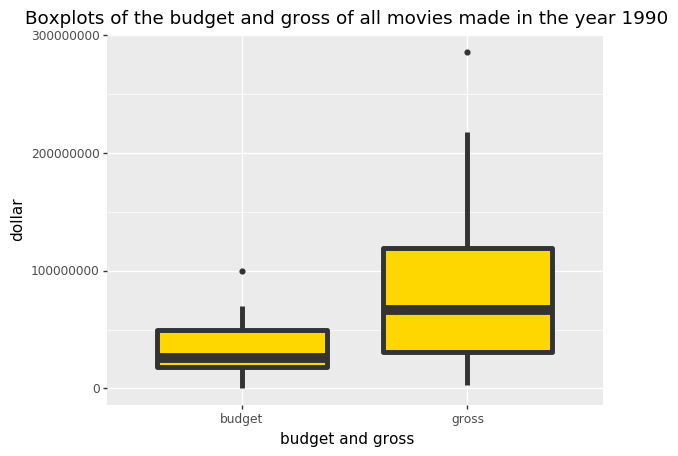

<ggplot: (280582557)>

In [3]:
###
### YOUR CODE HERE
###
mv_sub = movie[movie['title_year'] == 1990][['budget','gross']]
mv_sub_melt = mv_sub.melt()
plot = (ggplot(mv_sub_melt,aes(x='variable',y='value')) + geom_boxplot(fill='gold',size=2) +
    labs(title="Boxplots of the budget and gross of all movies made in the year 1990",
        x='budget and gross',y='dollar'))
plot

c) To the previous plot, add a line joining the mean of budget to the mean of gross. The line should be colored red, and of size 2. At each end of the line, you should have a red circles (instead of the crosses in https://peltiertech.com/images/2011-06/BoxPlotV5.png). 

Warning: the x-axis of this plot is categorical i.e. it consists of two values 'budget' and 'gross' rather than numbers. By default, with a categorical x-axis, ggplot will treat each x value as a separate group. Your line will then consist of one point for budget and one for gross, and ggplot will complain (you need at least 2 points in each group to draw a line). You can avoid this by forcing the group option to ignore the x-axis (by setting it to a dummy value).


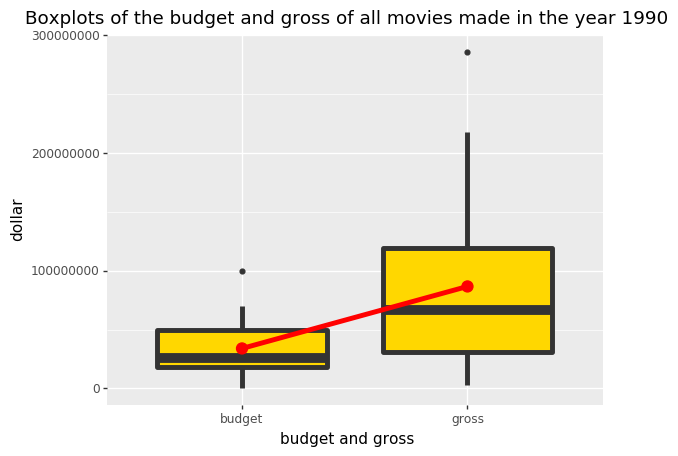

<ggplot: (7553605165)>

In [4]:
###
### YOUR CODE HERE
###
mv_mn = mv_sub_melt.groupby('variable').mean().reset_index()
(plot + geom_line(mv_mn,aes(x='variable',y='value',group=0),size=2,color='red')
    + geom_point(mv_mn,aes(x='variable',y='value',group=0),size=4,color='red'))

d) Create a plot with year on the x-axis, and two lines, the mean budget and the median budget of movies from that year. These lines should be colored differently and labeled.

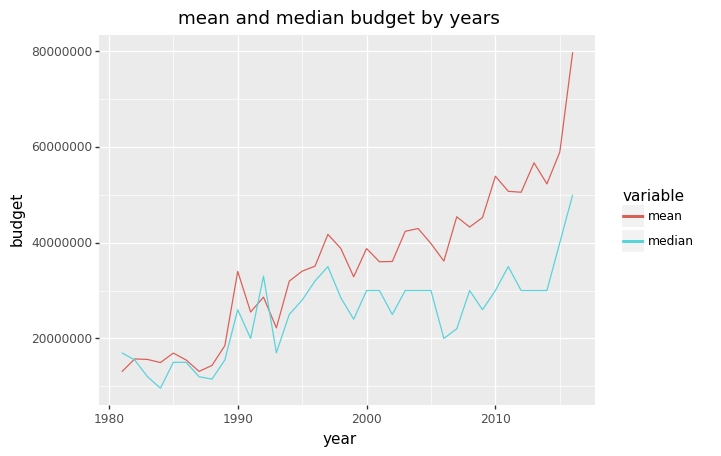

<ggplot: (7553589593)>

In [5]:
###
### YOUR CODE HERE
###

mv_sub = movie.groupby('title_year').agg({'budget':['mean','median']})
mv_sub = mv_sub.reset_index(col_level=1)
mv_sub.columns = mv_sub.columns.get_level_values(1)
mv_sub_melt = mv_sub.melt(id_vars='title_year',value_vars=['mean','median'])

plot = (ggplot(mv_sub_melt,aes(x='title_year',y='value',color='variable')) + geom_line()
    + labs(title='mean and median budget by years', x='year', y='budget'))

plot

In addition to the median, we now also want to calculate various quantiles (recall the median is the 50% quantile). Unfortunately, we cannot directly use the pandas method 'quantile' with agg, since quantile requires an additional argument, the quantile level (something like <code>movie.agg({'budget':[quantile(.25), quantile(.75)]})</code> will not work.

However, if there were a function q25 that takes only one input (say x), and calculates the 25% quantile of x, then 
<code>movie.agg({'budget':q25})</code> will work. 

e) Write two functions q25 and q75 that take a pandas series as input and calculate the 25 and 75 percent quantile respectively. By passing these to the agg method, create a dataframe with columns title_year, median, q25 and q75.

Then create a plot with 2 layers. One is a geom_line showing time vs the median budget, and the other is geom_ribbon showing the 25%-75% band of budgets for each year. Set the fill to have opacity of 0.5. The plot will resemble one of the facets here: https://support.sas.com/documentation/cdl/en/statug/63033/HTML/default/images/quantpanel24__.png

As always, make sure there is information so a viewer can understand your figure.

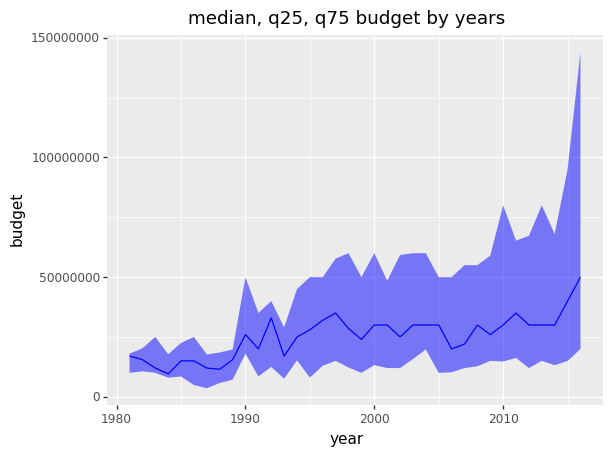

<ggplot: (7555515521)>

In [63]:
###
### YOUR CODE HERE
###

def q25(x):
    return x.quantile(.25)

def q75(x):
    return x.quantile(.75)


mv_sub = movie.groupby('title_year').agg({'budget':['median',q25,q75]})



# mv_sub = mv_sub.reset_index()
# mv_sub

#mv_sub['title_year']

mv_sub = mv_sub.reset_index(col_level=1)
mv_sub.columns = mv_sub.columns.get_level_values(1)


plot = (ggplot() + geom_line(mv_sub,aes(x='title_year',y='median'),color='blue')
    + geom_ribbon(mv_sub,aes(x='title_year',ymin='q25',ymax='q75'),fill='blue',alpha=0.5)
    + labs(title='median, q25, q75 budget by years',x='year',y='dollar'))

plot


f) Now create a plot with two facets in 1 row. One shows the same plot as before (for column budget), and the other show the median and 25%-75% band for column gross.

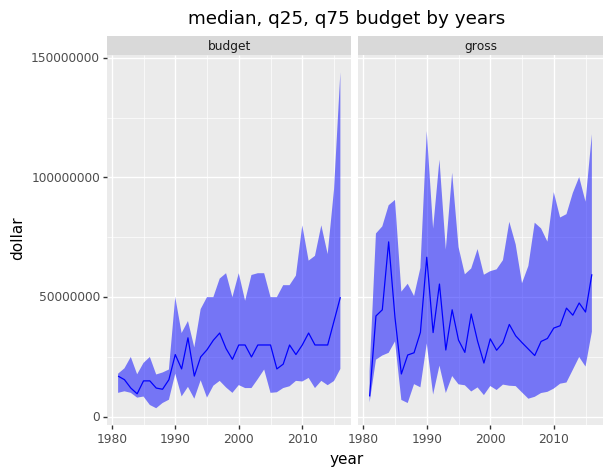

<ggplot: (7555743593)>

In [99]:
###
### YOUR CODE HERE
###

mv_sub = movie.groupby('title_year').agg({'budget':['median',q25,q75]})
mv_sub = mv_sub.reset_index(col_level=1)
mv_sub.columns = mv_sub.columns.get_level_values(1)
mv_sub['type'] = 'budget'

mv_sub_2 = movie.groupby('title_year').agg({'gross':['median',q25,q75]})
mv_sub_2 = mv_sub_2.reset_index(col_level=1)
mv_sub_2.columns = mv_sub_2.columns.get_level_values(1)
mv_sub_2['type'] = 'gross'

mv_sub = mv_sub.append(mv_sub_2)

plot = (ggplot() + geom_line(mv_sub,aes(x='title_year',y='median'),color='blue')
    + geom_ribbon(mv_sub,aes(x='title_year',ymin='q25',ymax='q75'),fill='blue',alpha=0.5)
    + labs(title='median, q25, q75 budget by years',x='year',y='dollar')
    + facet_grid('.~type'))

plot


## Q2: custom geom_smooth methods and kNN (2 + 3 + 3 + 3 + 6  + 3 + 5)

The cell below reads the stop-and-frisk dataset, applying the same transformation that the first question from HW3 asked from you (i.e. collapse different crime type). Run the cell below.

In [100]:
frisk = pd.read_csv('./frisk.csv')
frisk = frisk.groupby(['precinct','eth']).agg({"popl":"mean", 'stops':'sum','past':'sum'}).reset_index('eth')

a) Create a plot with two layers. The first is a scatterplot of popl (on the x-axis) vs stops (on the y-axis). The second is a geom_smooth layer, showing a straight line fitted to this data (along the error bands)

Note: this line is fit using one of the default methods of geom_smooth

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


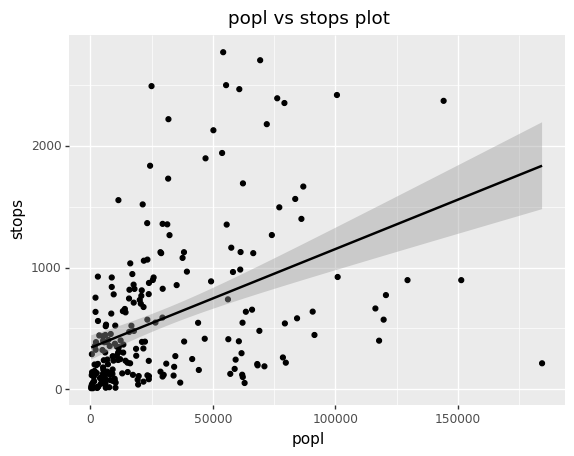

<ggplot: (7555778665)>

In [104]:
###
### YOUR CODE HERE
###
(ggplot(frisk,aes(x='popl',y='stops')) + geom_point() + geom_smooth(method='lm')
    + labs(title='popl vs stops plot'))

b) Now repeat part a), but fitting a different line for each ethnicity. Color the lines and the points according to ethnicity. Make sure your plot is titled/labeled.

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


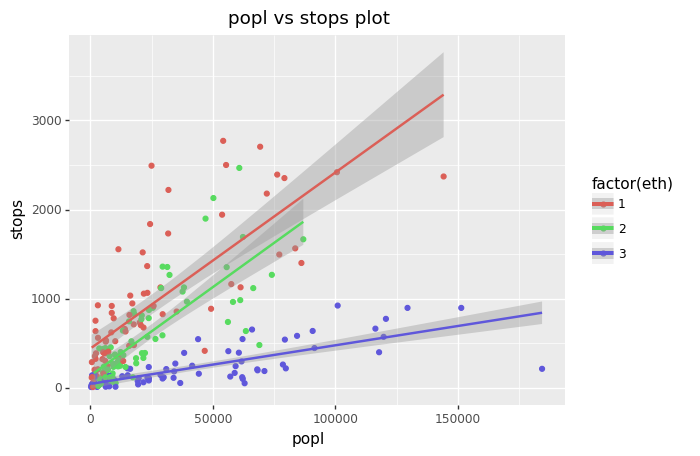

<ggplot: (7553279997)>

In [110]:
###
### YOUR CODE HERE
###
(ggplot(frisk,aes(x='popl',y='stops',color='factor(eth)')) + geom_point() + geom_smooth(method='lm')
    + labs(title='popl vs stops plot'))



c) A limitation of the default geom_smooth method is that is does not allow us to force the lines to pass through the origin (like we wanted in HW3). Luckily, you can pass your own smoothing function to geom_smooth.

The cell below gives the skeleton of how such a function should look. Its arguments are:
1. __data__: a dataframe of your original data with x and y columns,
2. __xseq__: a numpy array of values that ggplot will want predictions at
3. __**params__: miscellaneous parameters for ggplot, we don't have to worry about these. 

The function returns a dataframe again with 2 columns x and y. x will be xseq, and y will be the predicted values at xseq.

Copy the skeleton in the cell below to a new cell and fill in the details, where predicted values are obtained by fitting a line _through the origin_ to the input data.

(If you are interested, the link here has more details https://github.com/has2k1/plotnine/blob/master/plotnine/stats/stat_smooth.py ).

In [11]:
# COPY TO THE CELL BELOW AND FILL IN

def ols_orig(data, xseq, **params):
                # * data - has the x and y values for the model
                # * xseq - x values to be predicted
                # * params - stat parameters
                #
                # It must return a new dataframe whose column x is xseq,
                #  and y column are the predicted values.
                             
                # Create output data by getting predictions on
                # the xseq values
                
                # FILL IN YOUR CODE TO CALCULATE yseq
                
                
                data = pd.DataFrame({
                    'x': xseq,
                    'y': yseq
                })

                return data
            


In [129]:
###
### YOUR CODE HERE
###

def ols_orig(data, xseq, **params):
                # * data - has the x and y values for the model
                # * xseq - x values to be predicted
                # * params - stat parameters
                #
                # It must return a new dataframe whose column x is xseq,
                #  and y column are the predicted values.
                             
                # Create output data by getting predictions on
                # the xseq values
                
                # FILL IN YOUR CODE TO CALCULATE yseq
                mod = smf.ols(formula = 'y~x-1', data=data)
                rslt = mod.fit()
                
                yseq = xseq*rslt.params[0]
                
                data = pd.DataFrame({
                    'x': xseq,
                    'y': yseq
                })

                return data


d) Repeat part b), now using the previous function in geom_smooth. Your 3 lines should all pass through the origin. You won't have errorbands, but that is ok.

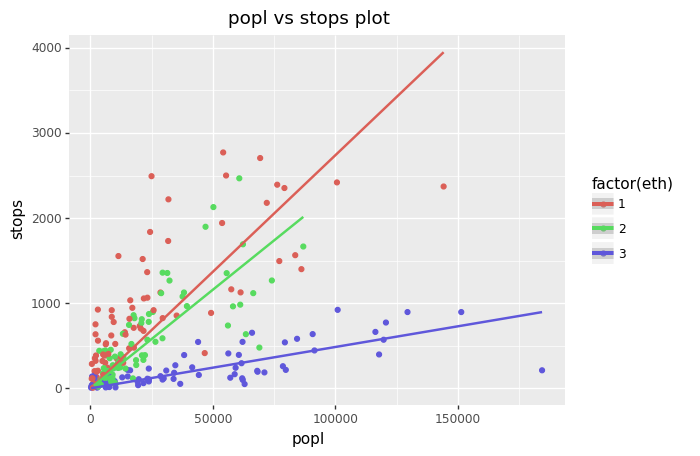

<ggplot: (7555722001)>

In [183]:
###
### YOUR CODE HERE
###
(ggplot(frisk,aes(x='popl',y='stops',color='factor(eth)')) + geom_point() + geom_smooth(method=ols_orig)
    + labs(title='popl vs stops plot ()'))

(e) We will now run geom_smooth with k nearest neighbors.

The cell below has the skelton of a function to do k nearest neighbors with k = 5. Like the function ols_orig, this too should return a dataframe with 2 columns x and y, x being xseq, and y, the predicted values at xseq. The predictions should be made by running knn on on the input data, with k=5.

Your code can proceed as follows: write a for-loop that loops through the elements of xseq. For each element,  calculate the k nearest x's in data, average their corresponding y's, and set it as the corresponding prediction.

(Note: this for-loop can be made more efficient, but we will not worry about this)

Hint: you might want to debug your function on a small toy dataset. 

In [14]:
# COPY TO THE CELL BELOW AND FILL IN

def knn5(data,xseq,**params):
    k = 5
    
    # FILL IN YOUR CODE HERE
    

In [176]:
###
### YOUR CODE HERE
###

def knn5(data,xseq,**params):
    k = 5
    
    # FILL IN YOUR CODE HERE
    
    yseq = []
    
    for x in xseq:
        data['dist'] = abs(data['x'] - x)
        data = data.sort_values(by=['dist'],ascending=True)
        predicted = data['y'].head(k).mean()
        yseq.append(predicted)
    data = pd.DataFrame({
        'x': xseq,
        'y': yseq
    })

    return data

f) Now repeat part b), using knn5 as the method used by geom_smooth.

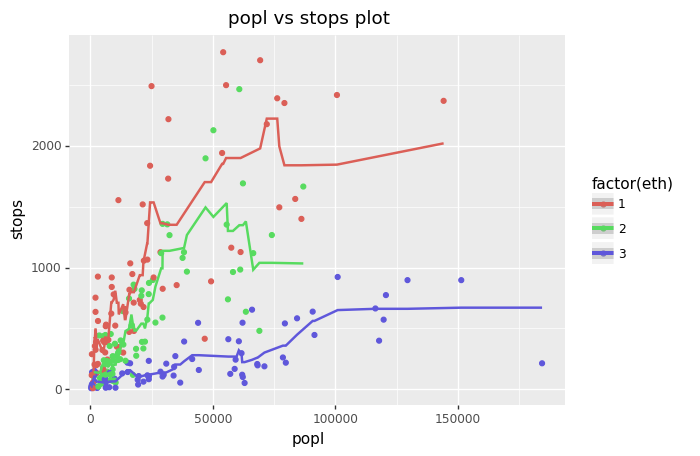

<ggplot: (7554246961)>

In [177]:
###
### YOUR CODE HERE
###
(ggplot(frisk,aes(x='popl',y='stops',color='factor(eth)')) + geom_point() + geom_smooth(method=knn5)
    + labs(title='popl vs stops plot'))

g) Repeat the above for k = 1 and k = 20. While it is possible to be more clever about this, it is sufficient if you define functions knn1 and knn20 by copying your code for knn5 and replacing k=5 with k=1 or k=20.

Note: for k=1, the lines for each group should pass through all their points.

In [178]:
###
### YOUR CODE HERE
###

def knn1(data,xseq,**params):
    k = 1
    
    # FILL IN YOUR CODE HERE
    
    yseq = []
    
    for x in xseq:
        data['dist'] = abs(data['x'] - x)
        data = data.sort_values(by=['dist'],ascending=True)
        predicted = data['y'].head(k).mean()
        yseq.append(predicted)
    data = pd.DataFrame({
        'x': xseq,
        'y': yseq
    })

    return data

def knn20(data,xseq,**params):
    k = 20
    
    # FILL IN YOUR CODE HERE
    
    yseq = []
    
    for x in xseq:
        data['dist'] = abs(data['x'] - x)
        data = data.sort_values(by=['dist'],ascending=True)
        predicted = data['y'].head(k).mean()
        yseq.append(predicted)
    data = pd.DataFrame({
        'x': xseq,
        'y': yseq
    })

    return data


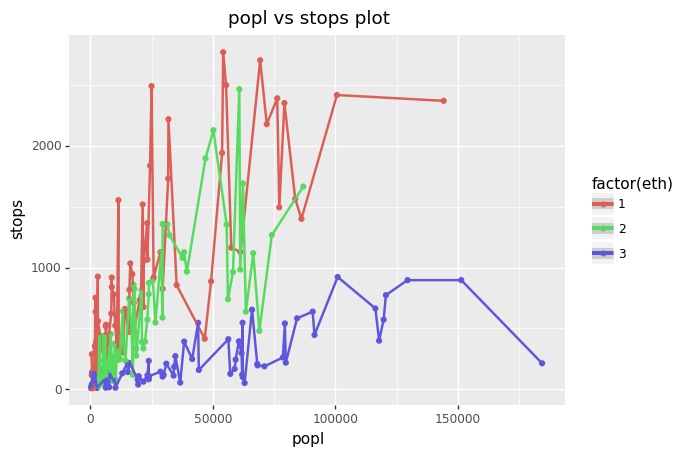

<ggplot: (7552567257)>

In [182]:
###
### YOUR CODE HERE
###
(ggplot(frisk,aes(x='popl',y='stops',color='factor(eth)')) + geom_point() + geom_smooth(method=knn1)
    + labs(title='popl vs stops plot'))



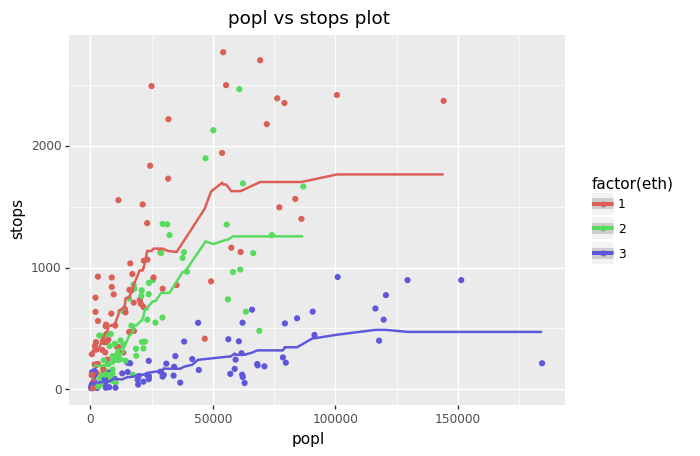

<ggplot: (7555531541)>

In [181]:
(ggplot(frisk,aes(x='popl',y='stops',color='factor(eth)')) + geom_point() + geom_smooth(method=knn20)
    + labs(title='popl vs stops plot'))